# DNA Analysis
## Introduction
Finding motifs in DNA sequences is an important matter in computational biology, especially to identify regulatory motifs. Given two sequences or a set of sequences, it is really interesting to search similarities between them in order to get insights or discover the causality of a common disease. 

Despite considerable efforts, DNA motif finding remains a complex challenge for DNA analyisis specialists. 

This use case and algorithms were obtained from the great work of the research team of Professor [Eamonn Keogh](http://www.cs.ucr.edu/~eamonn/). 

In this interactive application, we show how [Khiva's motif discovery algorithms](http://khiva-python.readthedocs.io/en/latest/khiva.html#module-khiva.matrix) can be used to solve this problem and provide an alternative for biologists.

In [89]:
import matplotlib.pyplot as plt
import khiva as kv
from random import randint
from ipywidgets import interact, IntSlider

%config IPCompleter.greedy=True
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 5]

## Backend
Prints the backend being used. The CPU, CUDA and OPENCL backends are available in Khiva.  
  
> This interactive application is being executed in **hub.mybinder** which doesn't provide a GPU and its CPU is quite limited so it could take some time.

In [90]:
print(kv.get_backend())

KHIVABackend.KHIVA_BACKEND_OPENCL


## Sequence generation and time series conversion
DNA sequences are represented as chains of 4 letters: A, G, C and T. This sequences of letters can be converted to a numerical time series using the algorithm described by [Eamonn Keogh](http://www.cs.ucr.edu/~eamonn/iSAX_2.0.pdf). 

This way, in the next cell we generate two random DNA Sequences and represent them as time series. This time series representation of the two sequences of DNA are shown below.

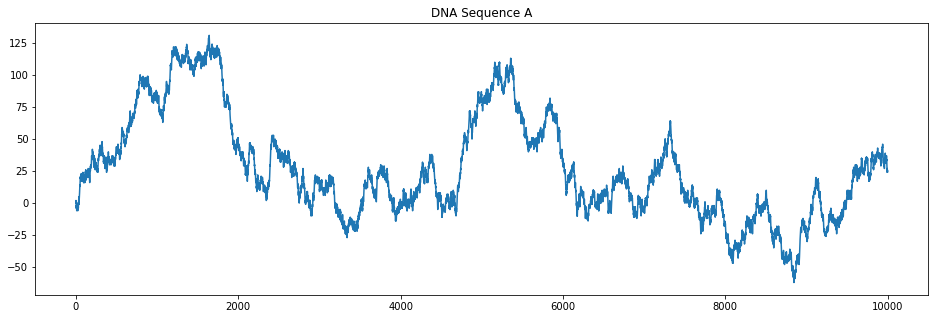

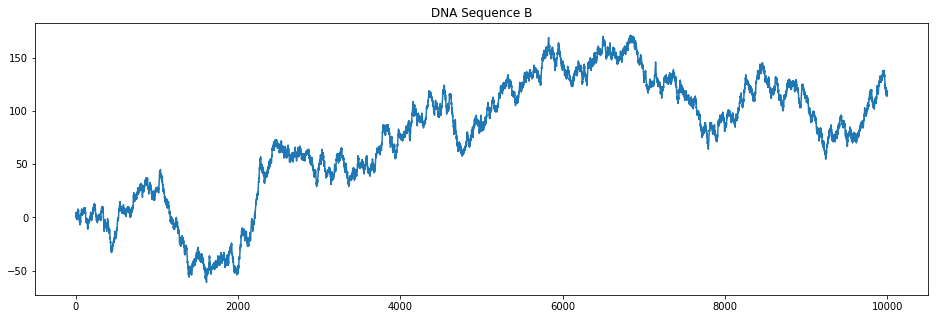

In [91]:
ADN = ["A", "G", "C", "T"]

first = [0]
second = [0]
sequence_a = []
sequence_b = []

DNA_2_time_series = {"A": 2, "G": 1 , "C": -1, "T": -2}

for a in range(1,10000):
    b = ADN[randint(0,3)]
    c = ADN[randint(0,3)]
    sequence_a.append(b)
    sequence_b.append(c)
    first.append(first[a-1] + DNA_2_time_series[b])
    second.append(second[a-1] + DNA_2_time_series[c])

plt.plot(range(len(first)), first)
plt.title("DNA Sequence A")
plt.show()

plt.title("DNA Sequence B")
plt.plot(range(len(second)), second)
plt.show()

## Motif discovery

Now, we use [Khiva's library](https://github.com/shapelets/khiva-python) to discover the best motif between the DNA sequences. First, we generate a matrix profile and obtain the best motif using it. 

The subsequence length can be selected by the slider provided below and the available values are all the integers between 30 and 150. 

In [92]:
def discover_motif(m):
    a = kv.Array(first, khiva_type=kv.dtype.f64)

    b = kv.Array(second, khiva_type=kv.dtype.f64)

    window = int(m/2)

    distance, profile = kv.stomp(a, b, m)
    c, d, e = kv.find_best_n_motifs(distance, profile, m, 1)

    d = d.to_numpy()
    e = e.to_numpy()

    plt.plot(range(d[0] - window, d[0] + window), first[d[0] - window:d[0] + window])
    plt.plot(range(d[0], (d[0] + m)), first[d[0]: (d[0] + m)])
    plt.title("Motif - DNA Sequence A")
    plt.show()

    plt.plot(range(e[0] - window, e[0] + window), second[e[0] - window:e[0] + window])
    plt.plot(range(e[0], e[0] + m), second[e[0]: e[0] + m])
    plt.title("Motif - DNA Sequence B")
    plt.show()
    
interact(discover_motif,m=IntSlider(min=30, max=150, step=1, value = 1,  continuous_update=False));


interactive(children=(IntSlider(value=30, continuous_update=False, description='m', max=150, min=30), Output()…

## Conclusions

The last decade has seen an intense research on all-pairs-similarity-search of DNA sequences. However, there has been surprisingly little progress made on similarity joins for time series subsequences.

Nowadays, with the technologies that we use in [Khiva](https://github.com/shapelets/khiva), it is possible to do it quickly and in a user-friendly way. 

This interactive application is used for discovering motifs, but discords can also be found with the same complexity. 
We provide the ability of executing these algorithms in GPU and CPU, obtaining the results in a high-performance manner.
